In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Create data for circular trajectories

In [3]:
# Create data for circles
n_points = 500
theta = np.linspace(0, 2 * np.pi, n_points)

data = pd.DataFrame({
    'X': [10 * np.cos(theta) for theta in np.linspace(0, 2 * np.pi, n_points)],
    'Y': [10 * np.sin(theta) for theta in np.linspace(0, 2 * np.pi, n_points)],
    'XL': [11 * np.cos(theta) for theta in np.linspace(0, 2 * np.pi, n_points)],
    'YL': [11 * np.sin(theta) for theta in np.linspace(0, 2 * np.pi, n_points)],
    'XR': [9 * np.cos(theta) for theta in np.linspace(0, 2 * np.pi, n_points)],
    'YR': [9 * np.sin(theta) for theta in np.linspace(0, 2 * np.pi, n_points)]
})

### Define a point where we want to put a vehicle

In [5]:
# Define the rectangle parameters
XC, YC = 7.07, 7.07  # Center of the rectangle
XD, YD = 1, -1  # Direction of the rectangle
width = 3
height = 4

# XC, YC = 0, 10  # Center of the rectangle
# XD, YD = 1, 0  # Direction of the rectangle (horizontal)

# XC, YC = 10, 0  # Center of the rectangle
# XD, YD = 0, -1  # Direction of the rectangle (horizontal)

### Set a rectangle around the vehicle

In [25]:
# Calculate the corner points of the rectangle using trigonometric functions
theta = np.arctan2(YD, XD)
print("Angle:",math.degrees(theta))
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)

rectangle_x = [XC + 0.5 * width * cos_theta - 0.5 * height * sin_theta,
               XC - 0.5 * width * cos_theta - 0.5 * height * sin_theta,
               XC - 0.5 * width * cos_theta + 0.5 * height * sin_theta,
               XC + 0.5 * width * cos_theta + 0.5 * height * sin_theta,
               XC + 0.5 * width * cos_theta - 0.5 * height * sin_theta]

rectangle_y = [YC + 0.5 * width * sin_theta + 0.5 * height * cos_theta,
               YC - 0.5 * width * sin_theta + 0.5 * height * cos_theta,
               YC - 0.5 * width * sin_theta - 0.5 * height * cos_theta,
               YC + 0.5 * width * sin_theta - 0.5 * height * cos_theta,
               YC + 0.5 * width * sin_theta + 0.5 * height * cos_theta]


Angle: -45.0


(-12.099771098199799,
 12.099989099914277,
 -12.099940049380002,
 12.099940049380002)

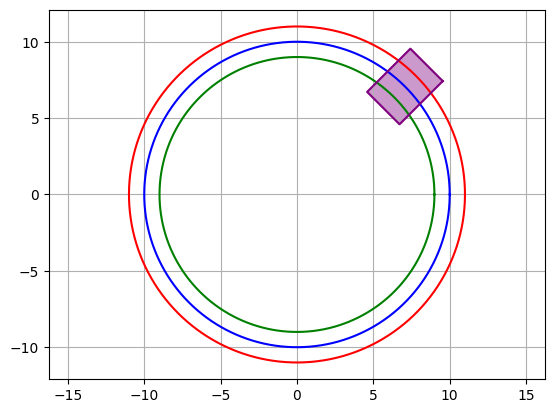

In [32]:
# Plot the curve
plt.figure()
plt.plot(data['X'], data['Y'],color='b')
plt.plot(data['XL'], data['YL'],color='r')
plt.plot(data['XR'],data['YR'],color='g')

plt.plot(rectangle_x,rectangle_y,color='purple')
# plt.fill_between(rectangle_x, rectangle_y, color='purple', alpha=0.4)
plt.fill(rectangle_x, rectangle_y, color='purple', alpha=0.4)

plt.grid()
plt.axis('equal')


### Extract only the data inside the rectangle

Function to check if points of the trajectories are in or out

In [28]:
def isin(X, Y):
    X = X - XC
    Y = Y - YC
    X_ = X*cos_theta + Y*sin_theta
    Y_ = -X*sin_theta + Y*cos_theta
    return (-width/2 <= X_) & (X_ <= width/2) & (-height/2 <= Y_) & (Y_ <= height/2)

In [29]:
# we apply the function to isolate the in points
m1 = isin(data['X'], data['Y'])
m2 = isin(data['XL'], data['YL'])
m3 = isin(data['XR'], data['YR'])

Plot of the "in" points

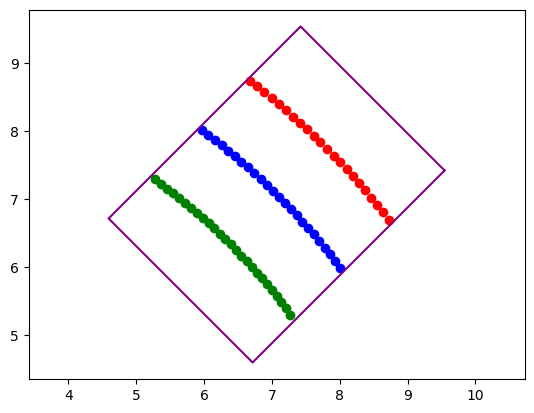

In [31]:
plt.scatter(data.loc[m1, 'X'], data.loc[m1, 'Y'], c='b')
plt.scatter(data.loc[m2, 'XL'], data.loc[m2, 'YL'], c='r')
plt.scatter(data.loc[m3, 'XR'], data.loc[m3, 'YR'], c='g')

plt.plot(rectangle_x, rectangle_y, c='purple')
plt.axis('equal')
plt.show()

### Rotate the plot

In [34]:
# Rotation function
def rotate_coordinates(X, Y, angle, XC, YC):
    # Convert angle to radians
    angle_rad = np.deg2rad(angle)

    # Translate to the origin
    X_translated = X - XC
    Y_translated = Y - YC

    # Perform the rotation
    X_rotated = X_translated * np.cos(angle_rad) - Y_translated * np.sin(angle_rad)
    Y_rotated = X_translated * np.sin(angle_rad) + Y_translated * np.cos(angle_rad)

    # Translate back to the original position
    X_rotated += XC
    Y_rotated += YC

    return X_rotated, Y_rotated

In [35]:
# This angle depends on the previously calculate 
angle_degrees=135

rotate_with_parameters= lambda X,Y: rotate_coordinates(X,Y,angle_degrees,XC,YC)
rec = list(map(rotate_with_parameters,rectangle_x,rectangle_y))
print(rec)
# RX = [item[0] for item in rec]
# RY = [item[1] for item in rec]
# print(RX,RY)

RX,RY= zip(*rec)
print(RX,RY)

[(5.07, 8.57), (5.07, 5.57), (9.07, 5.57), (9.07, 8.57), (5.07, 8.57)]
(5.07, 5.07, 9.07, 9.07, 5.07) (8.57, 5.57, 5.57, 8.57, 8.57)


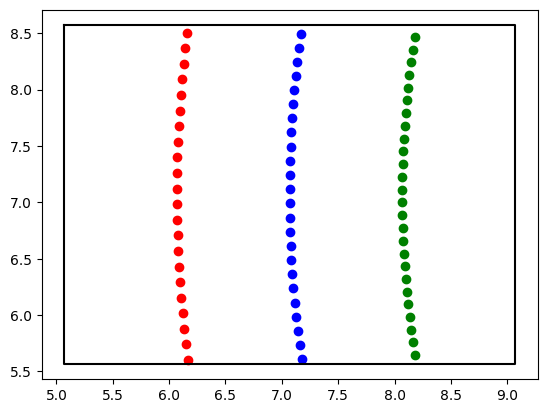

In [37]:
plt.plot(RX,RY,c='k')
XRotated,YRotated=rotate_coordinates(data.loc[m1, 'X'], data.loc[m1, 'Y'], angle_degrees, XC, YC)
plt.scatter(XRotated,YRotated,c='b')
XLRotated,YLRotated=rotate_coordinates(data.loc[m2, 'XL'], data.loc[m2, 'YL'], angle_degrees, XC, YC)
plt.scatter(XLRotated,YLRotated,c='r')
XRRotated,YRRotated=rotate_coordinates(data.loc[m3, 'XR'], data.loc[m3, 'YR'], angle_degrees, XC, YC)
plt.scatter(XRRotated,YRRotated,c='g')
plt.axis('equal')
plt.show()